In [37]:
# Reimportar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Recarregar o dataset
df = pd.read_csv("station_data_dataverse.csv")

In [39]:
# Selecionar apenas colunas numéricas
data_numeric = df.select_dtypes(include=['number'])

In [29]:
# Selecionar features (X) e target (y)
columns_to_use = [col for col in data_numeric.columns if col != 'kwhTotal']
target = 'kwhTotal'

In [30]:
X = data_numeric[columns_to_use]
y = data_numeric[target]

In [31]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Treinamento do modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# Avaliação do modelo
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [34]:
# Exemplo de previsões para análise
X_test_sample = X_test.iloc[:5]
y_test_sample = y_test.iloc[:5]

In [35]:
rmse, X_test_sample, y_test_sample, y_pred[:5]

(1.6209833550545083,
       sessionId  dollars  startTime  endTime  chargeTimeHrs   distance  \
 291     3071699     1.33         16       21       5.408611        NaN   
 3354    5140342     0.00         18       22       3.480278   3.177218   
 2093    8107489     0.00         15       18       2.916944  31.593840   
 432     9846685     0.00         18       21       2.601389  24.856621   
 479     9998167     0.00         12       15       3.058056  24.856621   
 
         userId  stationId  locationId  managerVehicle  facilityType  Mon  \
 291   65023200     366832      978130               1             2    0   
 3354  95411349     914305      648339               1             2    0   
 2093  92283246     474204      481066               0             2    0   
 432   97867440     369001      493904               1             1    0   
 479   97867440     955429      493904               1             1    0   
 
       Tues  Wed  Thurs  Fri  Sat  Sun  reportedZip  
 291     

In [40]:
# Seleção de amostras para o gráfico
n_samples = 50
y_test_sample = y_test[:n_samples].reset_index(drop=True)
y_pred_sample = y_pred[:n_samples]

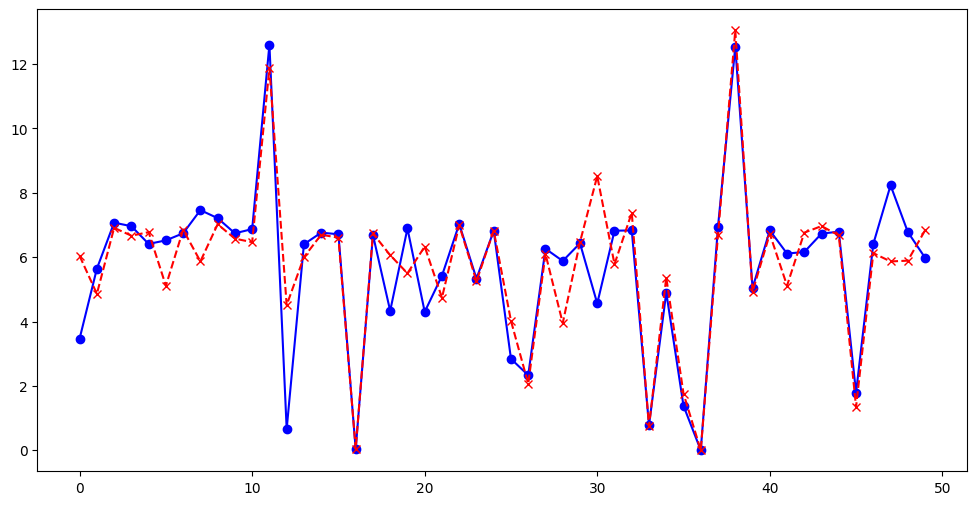

In [41]:
# Criação do gráfico
plt.figure(figsize=(12, 6))
plt.plot(y_test_sample, label='Valores Reais', marker='o', linestyle='-', color='blue')
plt.plot(y_pred_sample, label='Valores Previstos', marker='x', linestyle='--', color='red')